# Description
This notebook analyzie and visulalize precipitaion data.

In [34]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import csv
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2xiu0-UAcacQtF86xGLyUvCRku6etGuNb556swUbTsKT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'firstproject-donotdelete-pr-1yyn4aw84cgeim'
object_key = 'top-500-movies.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0


## Erasing unnecessary columns 

Here I remove the unnecessary columns to work with needed columns and raws.

In [35]:
df_data_1 = df_data_1.drop(['url', 'domestic_gross', 'opening_weekend', 'mpaa', 'theaters', 'runtime'], axis=1)
df_data_1.head(5)

,rank,release_date,title,production_cost,worldwide_gross,genre,year
0,1,2019-04-23,Avengers: Endgame,400000000,2797800564,Action,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,Adventure,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,365000000,1395316979,Action,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,2064615817,Adventure,2015.0
4,5,2018-04-25,Avengers: Infinity War,300000000,2048359754,Action,2018.0


## Renaming title of each columns

Here I renamed columns' title

In [36]:
df_data_1 = df_data_1.rename(columns={"rank": "Rank", "release_date": "Release Date", "title": "Title", "production_cost": "Production Cost","worldwide_gross": "Worldwide Gross", "genre": "Genre", "year": "Year" })
df_data_1.head()

,Rank,Release Date,Title,Production Cost,Worldwide Gross,Genre,Year
0,1,2019-04-23,Avengers: Endgame,400000000,2797800564,Action,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,Adventure,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,365000000,1395316979,Action,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,2064615817,Adventure,2015.0
4,5,2018-04-25,Avengers: Infinity War,300000000,2048359754,Action,2018.0


## Calculating the profit of each movie
By using the follwing formula; `df_data_1['Profit'] = df_data_1['Worldwide Gross'] - df_data_1['Production Cost']`
 I would calculate the **profit** of each movie in the list and add the **Profit** to the table.

In [37]:
df_data_1['Profit'] = df_data_1['Worldwide Gross'] - df_data_1['Production Cost']
df_data_1.head()

,Rank,Release Date,Title,Production Cost,Worldwide Gross,Genre,Year,Profit
0,1,2019-04-23,Avengers: Endgame,400000000,2797800564,Action,2019.0,2397800564
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,Adventure,2011.0,666713802
2,3,2015-04-22,Avengers: Age of Ultron,365000000,1395316979,Action,2015.0,1030316979
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,2064615817,Adventure,2015.0,1758615817
4,5,2018-04-25,Avengers: Infinity War,300000000,2048359754,Action,2018.0,1748359754


## Visulizing data

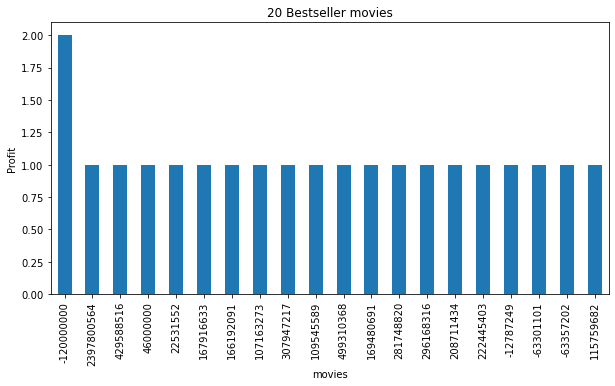

In [46]:
df_data_1.Profit.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("20 Bestseller movies")
plt.ylabel('Profit')
plt.xlabel('movies');